# Manejo de Datos faltantes a un Dataset de Diabetes de la India

Instalando Librerías

In [190]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

Importando librerías personalizadas

In [191]:
# conda install nbformat
%run ./util/pandas-missing-extension.ipynb

Configurando aspecto de las gráficas

In [192]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

Extracción de datos

In [193]:
diabetes_df = pd.read_csv(
    filepath_or_buffer='../data/pima-indians-diabetes.csv', # or pima_indians_diabetes_url
    sep=",",
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",
    ]
)

oceanbuoys_df = pyreadr.read_r('../data/oceanbuoys.rda')
oceanbuoys_df = oceanbuoys_df['oceanbuoys']

pedestrian_df = pyreadr.read_r('../data/pedestrian.rda')
pedestrian_df = pedestrian_df['pedestrian']

riskfactors_df = pyreadr.read_r('../data/riskfactors.rda')
riskfactors_df = riskfactors_df['riskfactors']

## Exploración

In [194]:
riskfactors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

In [195]:
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


### Resúmenes básicos de valores faltantes

#### Número total de valores completos (sin observaciones faltantes)

In [196]:
riskfactors_df.missing.number_complete()

7144

#### Número total de valores faltantes

In [197]:
riskfactors_df.missing.number_missing()

1186

### Resúmenes tabulares de valores faltantes

#### Variables / Columnas

##### Resumen por variable

In [198]:
riskfactors_df.missing.missing_variable_summary()
# Esta función nos da un mayor panorama de los valores faltantes por viarable y podemos observar
# Que en pregnant o indicador prenatal tenemos un 87% de valores faltantes

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


##### Tabulación del resumen por variable

In [199]:
riskfactors_df.missing.missing_variable_table()
# Aca podemos observar que hay 10 variables con 0 observaciones faltantes

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


#### Casos / Observaciones / Filas

##### Resúmenes por caso

In [200]:
riskfactors_df.missing.missing_case_summary()
# Aca observamos que hay filas que tienen mas del 16% de valores faltantes

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


##### Tabulación del resumen por caso

In [201]:
riskfactors_df.missing.missing_case_table()
# Observamos que la mayoría de casos u observaciones tienen 4 valores faltantes

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


### Intervalos de valores faltantes

In [202]:
(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable="pregnant",
        span_every=50
    )
)
# Aca dividimos en intervalo de 50 la variable del indicador prenatal y vemos que en cada bloque
# tiene mas del 80% de valores faltantes, por ejemplo en el primer bloque tiene 46 
# valores faltantes y 4 completado teniendo un porcentaje del 8% de completados

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,46,4,92.0,8.0
1,1,44,6,88.0,12.0
2,2,45,5,90.0,10.0
3,3,44,6,88.0,12.0
4,4,36,9,80.0,20.0


### _Run length_ de valores faltantes

In [203]:
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable= "pregnant"
    )
)
# Como vimos que en este indicador prenatal hay muchos faltantes, con run podemos ver la racha
# de los valores faltantes, vemos que no tiene una racha comun, ya que varia mucho
# de 9 faltantes viene un completo y leugo viene 14 faltantes y luego 1 valor completo...

,run_length,is_na
0,9,missing
1,1,complete
2,14,missing
3,1,complete
4,4,missing
5,1,complete
6,5,missing
7,1,complete
8,24,missing
9,1,complete


## Visualización inicial de valores faltantes

### Variable

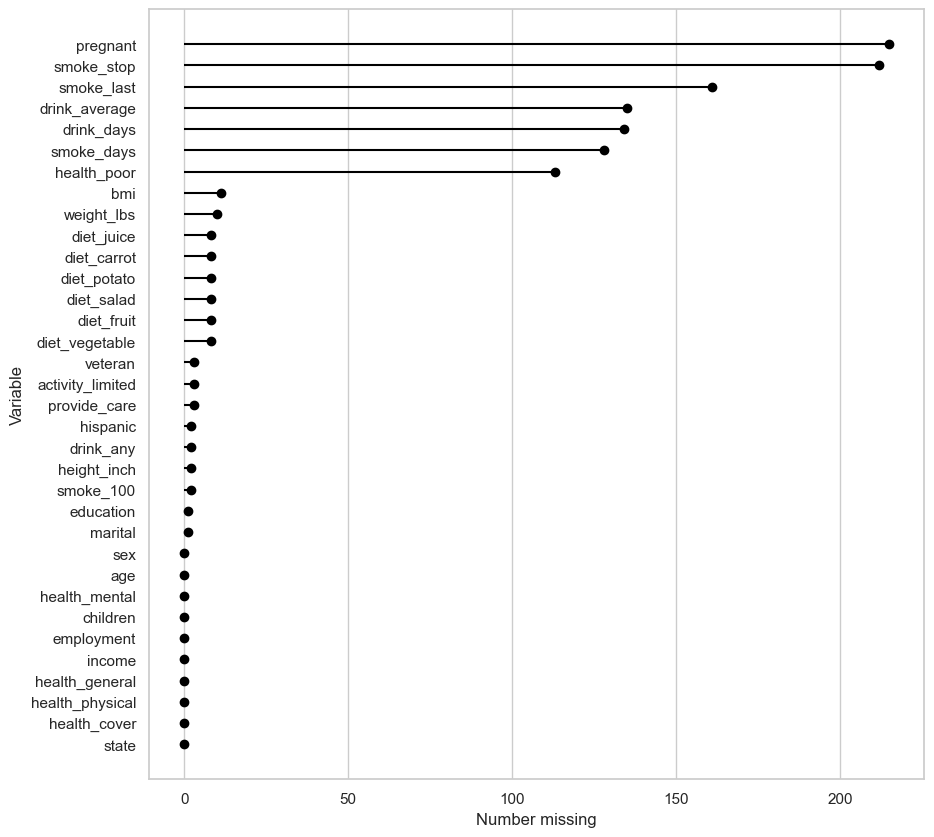

In [204]:
# Como estuvimos observando arriba, pregnant tiene mayor cantidad de valores faltantes
# junto con smoke_stop y smoke_last
riskfactors_df.missing.missing_variable_plot()

<Axes: >

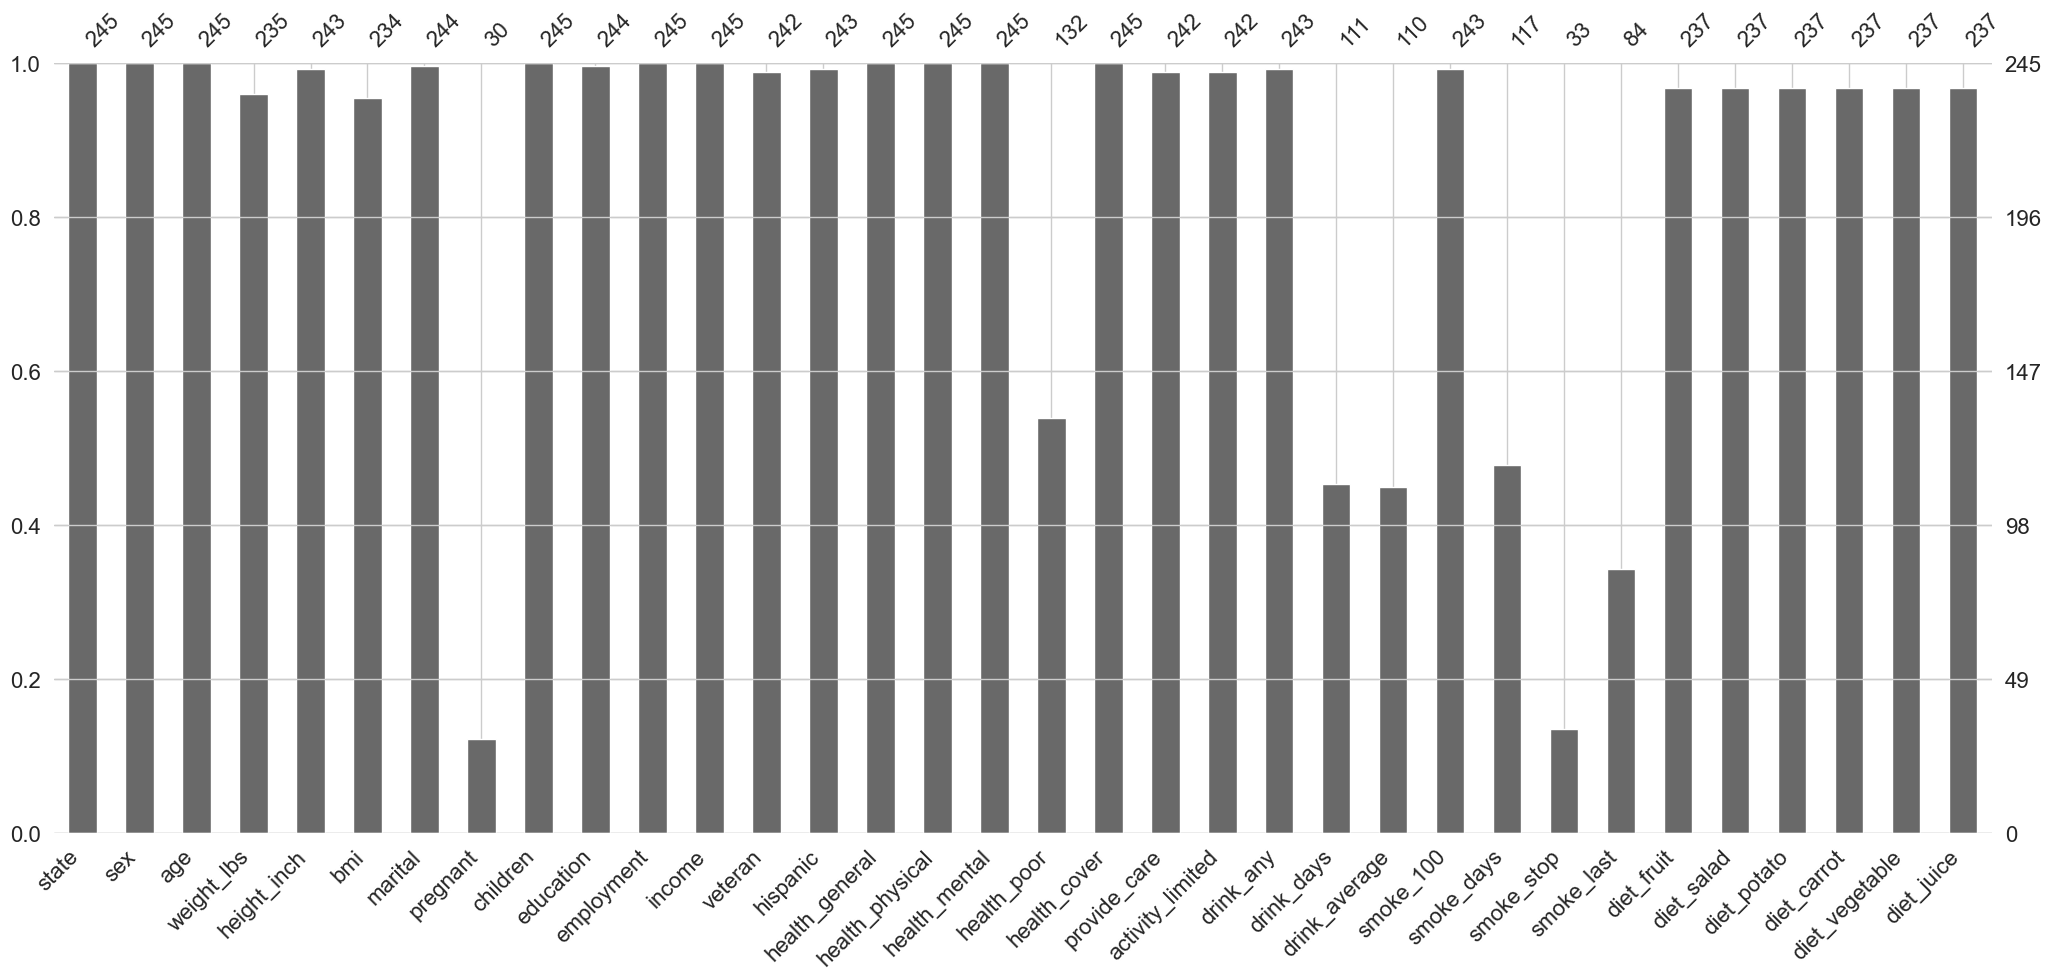

In [205]:
# Tambien podemos observarlo con missingno
missingno.bar(df=riskfactors_df)

### Casos / Observaciones / Filas

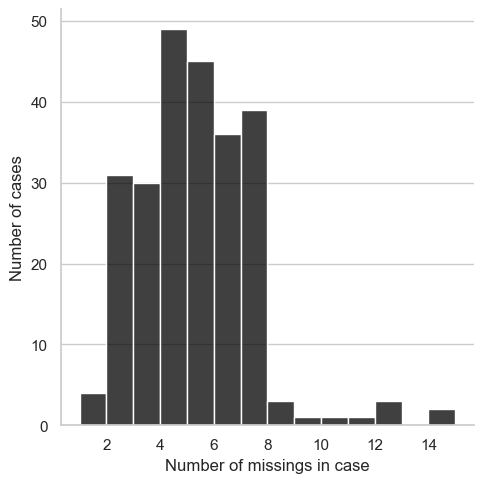

In [206]:
riskfactors_df.missing.missing_case_plot()
# Observamos que hay 49 filas que tienen 4 faltantes

#### Porcentaje de faltantes por intervalos de una variable

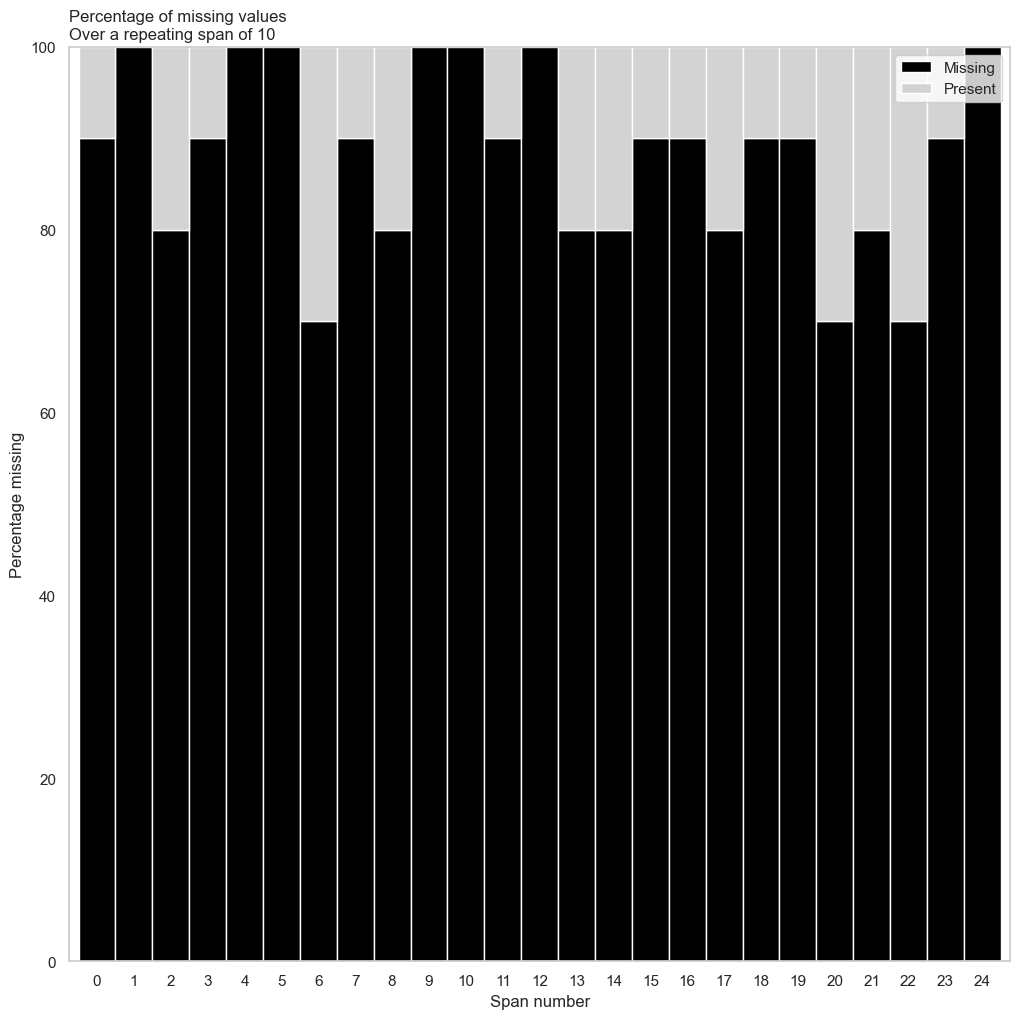

In [207]:
riskfactors_df.missing.missing_variable_span_plot(
    variable='pregnant',
    span_every=10
)
# Vemos que hay una gran porcentaje de valores faltantes en cada span o intervalo

#### Tamaño e intersección de valores faltantes

c:\Users\User\.conda\envs\conda\Lib\site-packages\upsetplot\plotting.py:660: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
c:\Users\User\.conda\envs\conda\Lib\site-packages\upsetplot\plotting.py:661: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

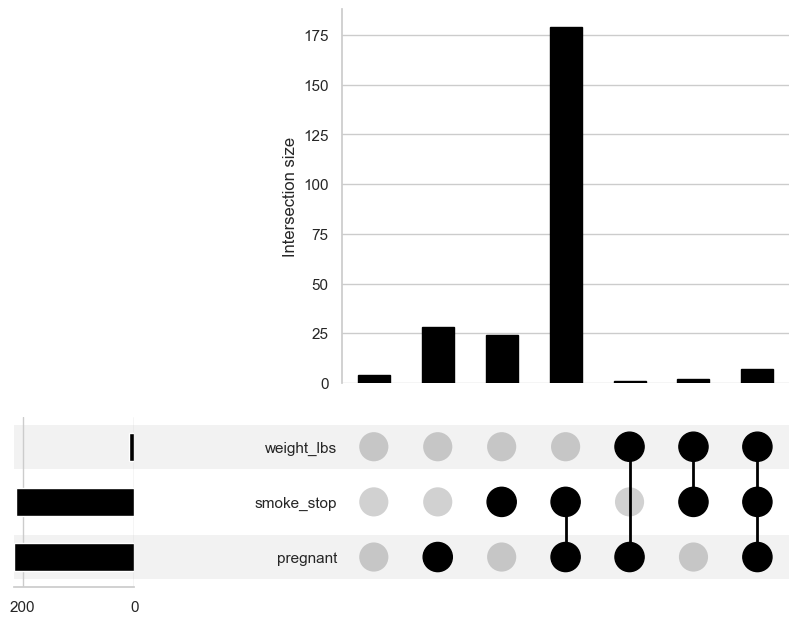

In [208]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables = ['pregnant', 'weight_lbs', 'smoke_stop'],
        element_size = 60
    )
)
# Aca podemos ver que la relación de pregnant y smoke stop comparte muchas filas faltantes

## Codificación de valores faltantes

In [209]:
# Aveces hay valores que no son detectados como valores faltantes para ello tenemos que explorar mas alfondo
# para asegurarnos que no haya valores no son detectados por los algoritmos anteriores

riskfactors_df.select_dtypes(include=object).apply(pd.unique)
# Al parecer los valores faltantes aparecen como nana, lo cual no va a ser necesario reemplazar

weight_lbs        [190, 170, 163, 230, 135, 165, 150, 146, 260, ...
height_inch       [64, 68, 74, 62, 70, 73, 72, 66, nan, 67, 63, ...
health_poor       [2, 3, nan, 30, 14, 4, 0, 10, 25, 15, 1, -7, -...
drink_days        [nan, 15, 2, 4, 3, 1, 10, 9, 30, 13, 17, 25, 5...
drink_average              [nan, 2, 5, 1, 3, 8, -7, 6, 7, -9, 4, 9]
diet_fruit        [1095, 52, 36, nan, -7, 24, 156, 365, 104, 12,...
diet_salad        [261, 209, 156, nan, 52, 24, 84, 0, 104, 365, ...
diet_potato       [104, 52, nan, 209, 24, 144, 0, -7, 36, 261, -...
diet_carrot       [156, 0, 24, nan, 261, 52, 104, -7, 12, 365, -...
diet_vegetable    [521, 52, 24, nan, 365, 730, 0, 1095, -7, 156,...
diet_juice        [12, 0, 24, nan, 104, 365, 261, 52, 36, 156, -...
dtype: object

## Manejo de valores faltantes implícitos a explícitos

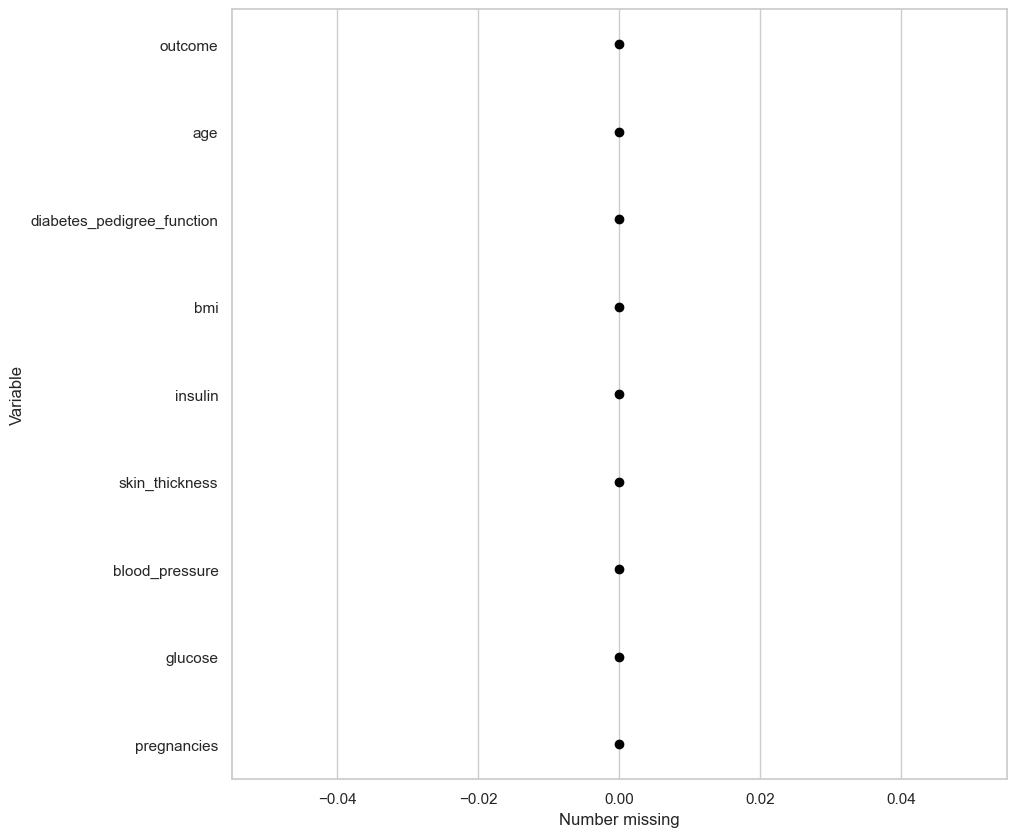

In [210]:
# Como podemos observar en la variable diabetes no se observa valores faltantes, sin embargo hay 0
diabetes_df.missing.missing_variable_plot()

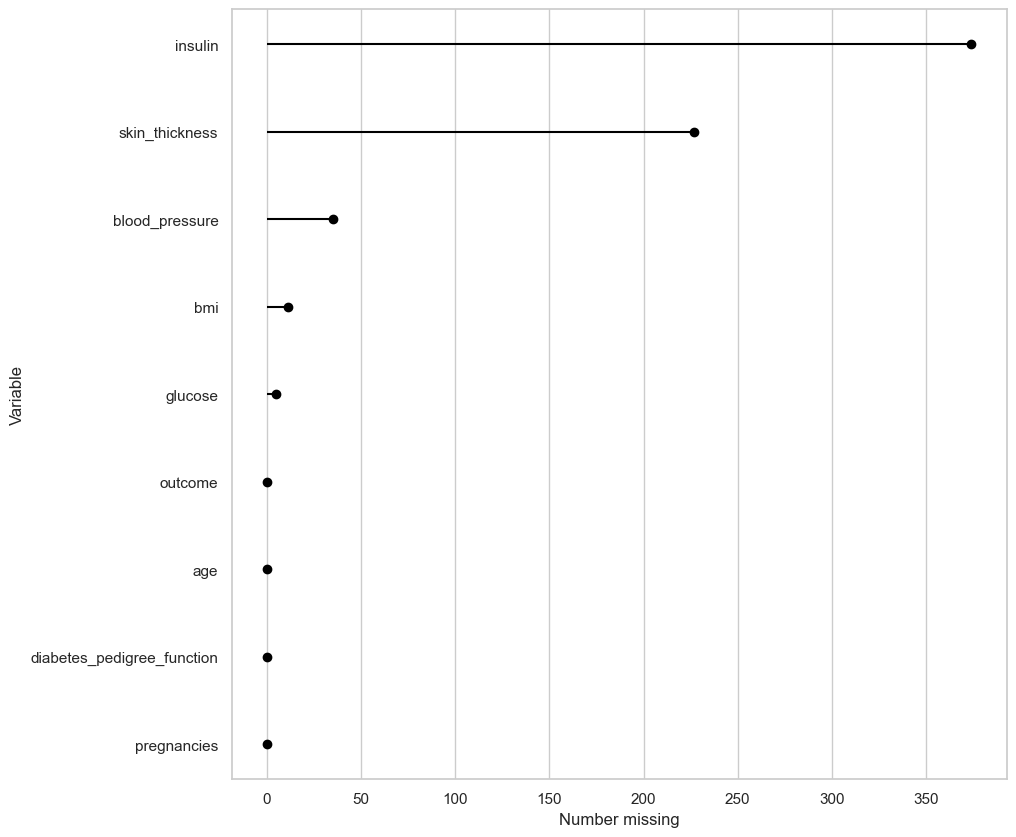

In [211]:
# Reemplazaremos los 0 por valores faltantes np.nan
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)
diabetes_df.missing.missing_variable_plot()

<Axes: >

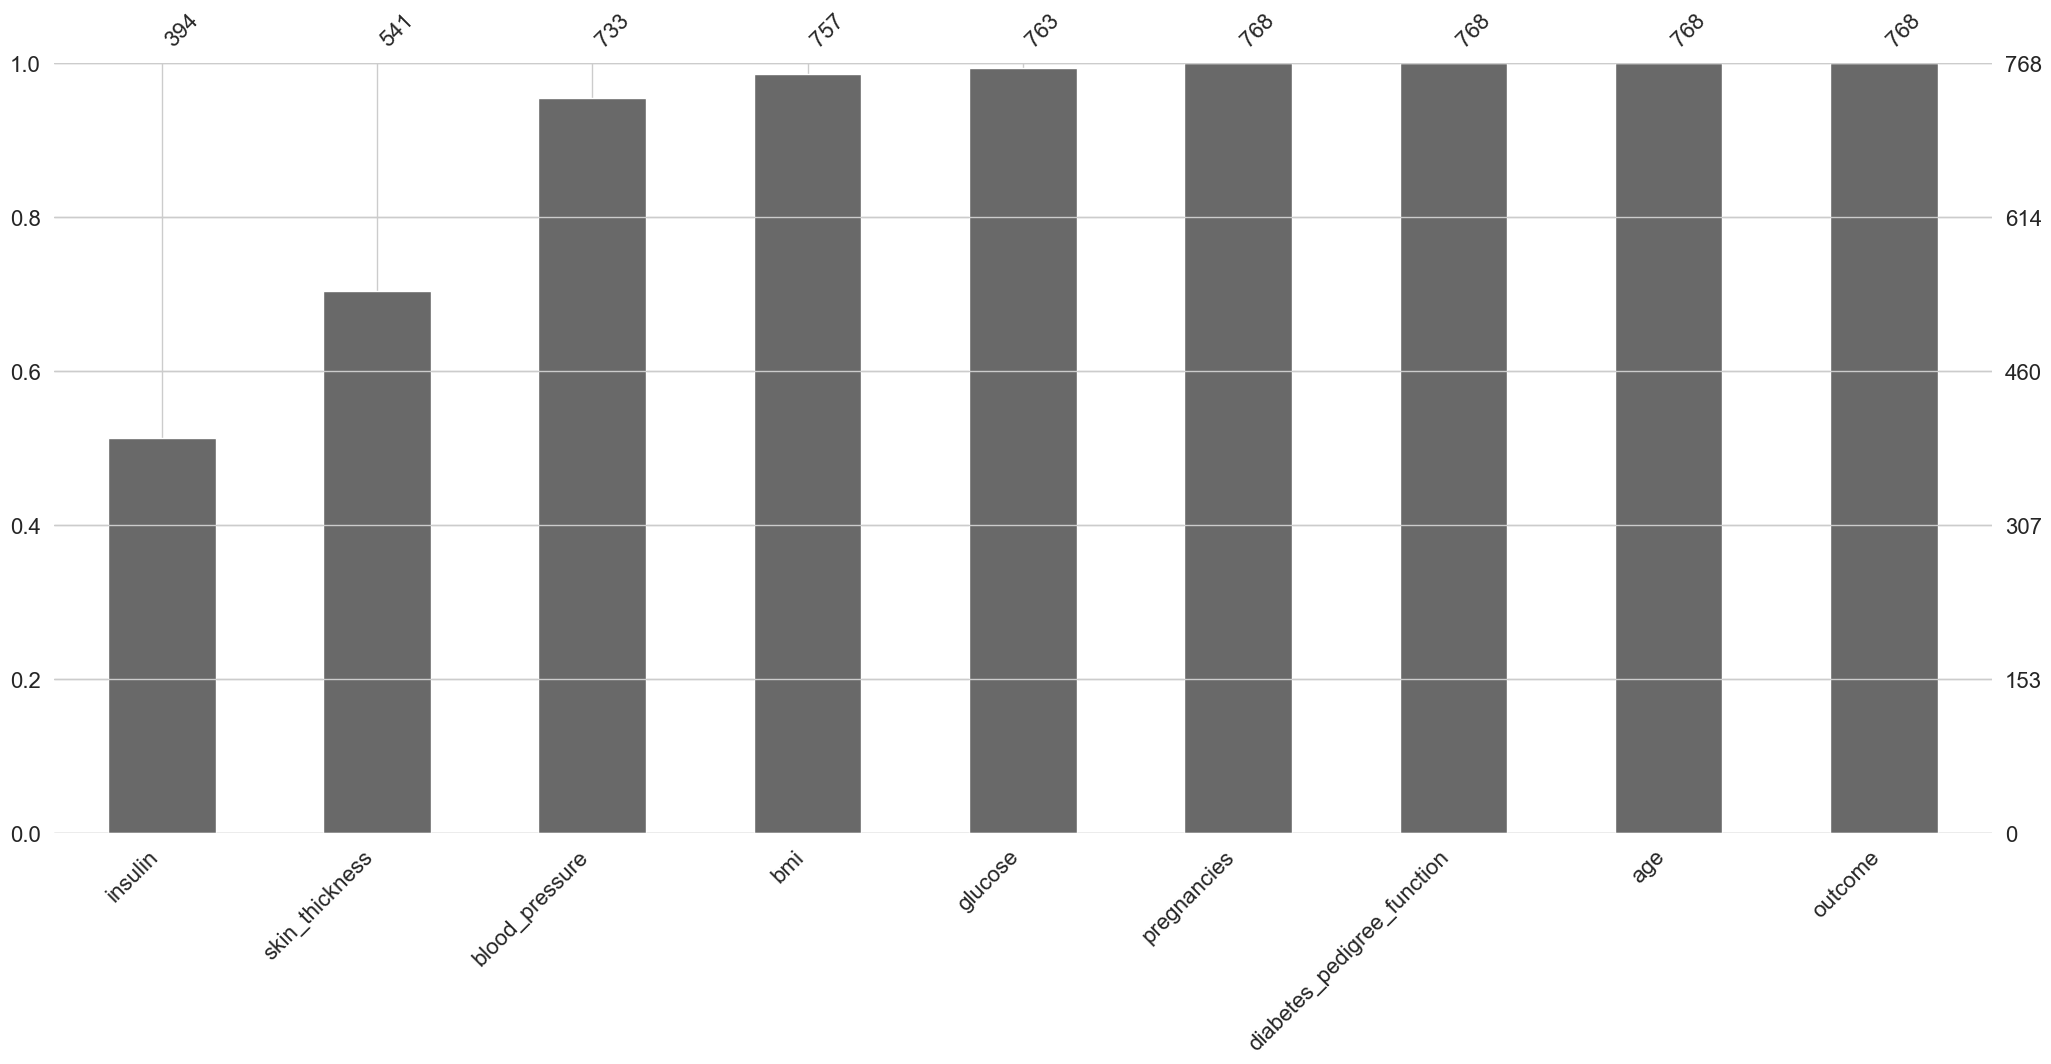

In [212]:
(
    diabetes_df
    .missing.sort_variables_by_missingness() # Ordena las columnas por cantidad de valores faltantes
    .pipe(missingno.bar)
)
# Vemos que la cantidad de valores faltantes en insulina es mayor que las demas

## Matriz de sombras

In [213]:
# Elaboramos una matriz de sombra
(
    riskfactors_df
    .missing
    .bind_shadow_matrix()
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


In [214]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .groupby(["weight_lbs_NA"])
    ["age"]
    .describe()
    .reset_index()
)
# Con esta tabla podemos obtener estadisticos, por ejemplo aca hemos sacado la edad, y vemos que los valores faltantes de peso
# tienen una edad promedio de 60, esto significa que las personas que tienen 60 no quieren reportar su peso

,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


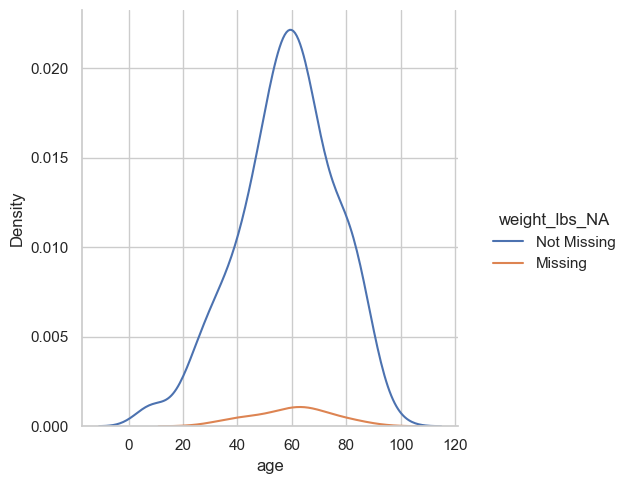

In [215]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="age",
                hue="weight_lbs_NA",
                kind="kde"
            )
        )
    )
)

## Visualización de valores faltantes en dos variables

In [216]:
def column_fill_with_dummies(
    column: pd.Series,
    proportion_below: float=0.10,
    jitter: float=0.075,
    seed: int=42
) -> pd.Series:

    column = column.copy(deep=True)

    # Extract values metadata.
    missing_mask = column.isna()
    number_missing_values = missing_mask.sum()
    column_range = column.max() - column.min()

    # Shift data
    column_shift = column.min() - column.min() * proportion_below

    # Create the "jitter" (noise) to be added around the points.
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

    # Save new dummy data.
    column[missing_mask] = column_shift + column_jitter

    return column

<Axes: xlabel='weight_lbs', ylabel='height_inch'>

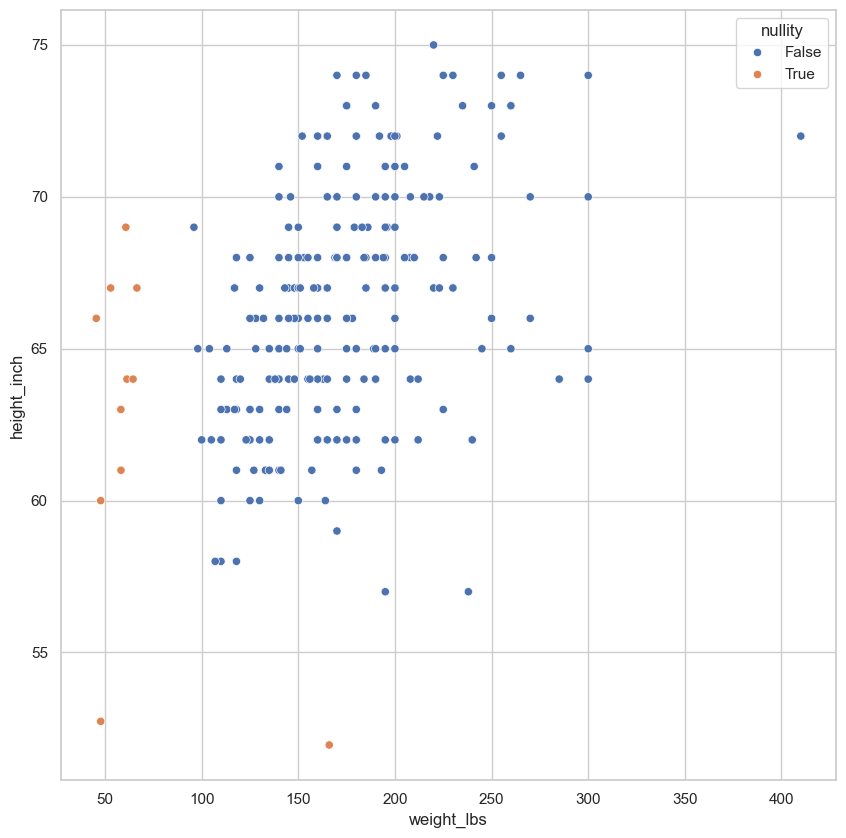

In [217]:
plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .select_dtypes(
        exclude="category"
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]]
    )
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        lambda column: column if "_NA" in column.name else column_fill_with_dummies(column, proportion_below=0.05, jitter=0.075)
    )
    .assign(
        nullity=lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data=df,
                x="weight_lbs",
                y="height_inch",
                hue="nullity"
            )
        )
    )
)

## Correlación de nulidad

<Axes: >

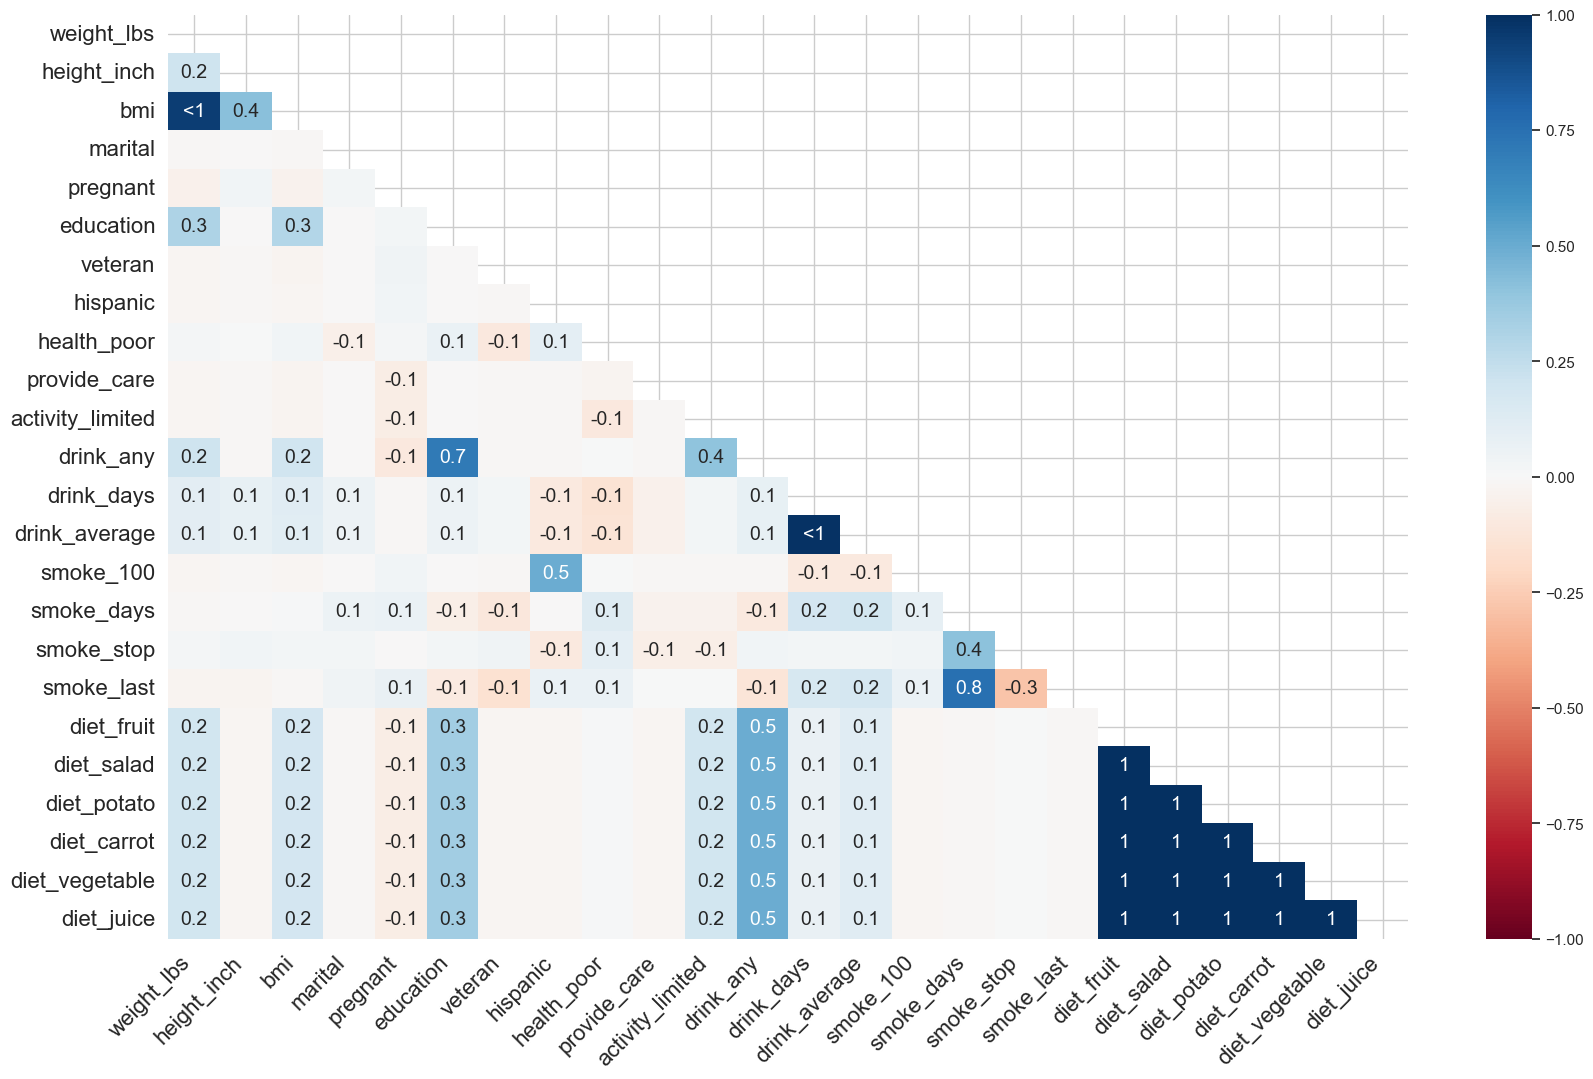

In [218]:
missingno.heatmap(
    df=riskfactors_df
)

<Axes: >

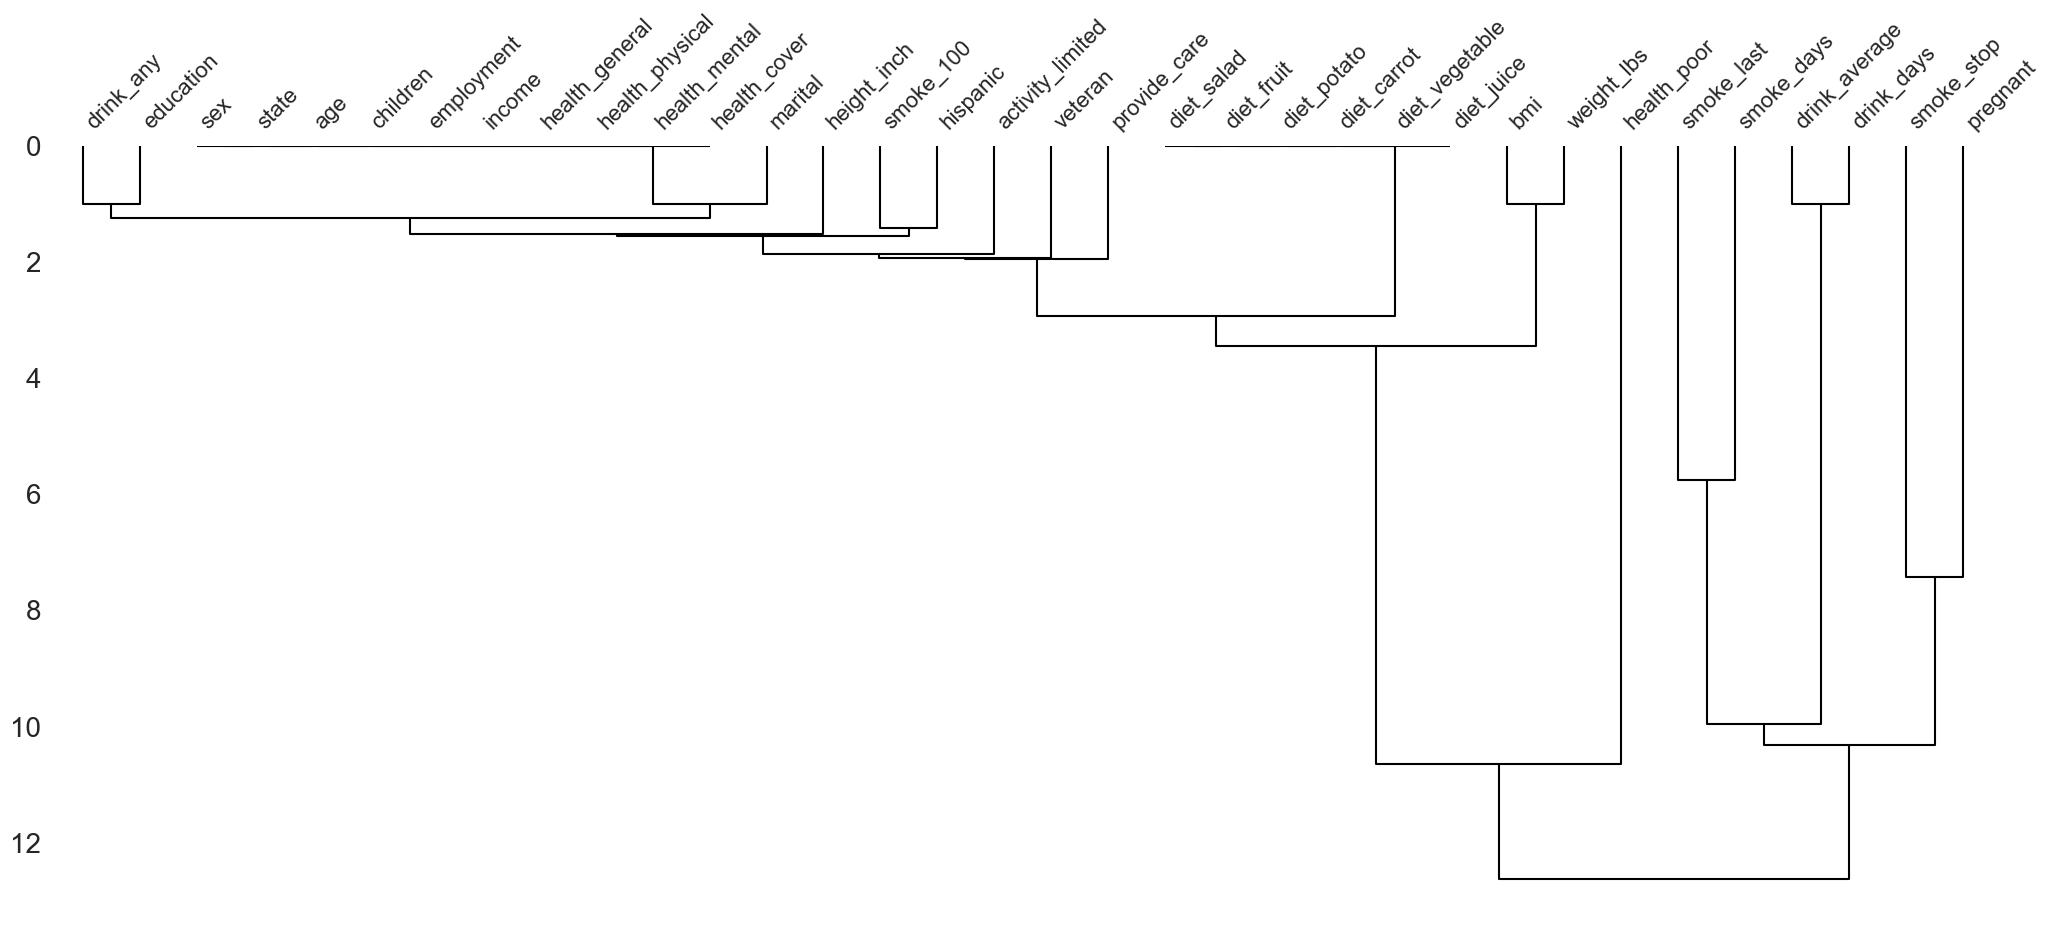

In [219]:
missingno.dendrogram(
    df=riskfactors_df
)
# Con el dendogram podemos ver como se agrupan las variables que tienen similitud en sus patrones, en terminos de valores faltantes

## Eliminación de valores faltantes

In [220]:
# Vericamos la cantidad de observaciones
riskfactors_df.shape

(245, 34)

In [221]:
# Observamos la cantidad de datos con nulos y sin nulos
riskfactors_df.weight_lbs.size, riskfactors_df.weight_lbs.count()

(245, 235)

c:\Users\User\.conda\envs\conda\Lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)


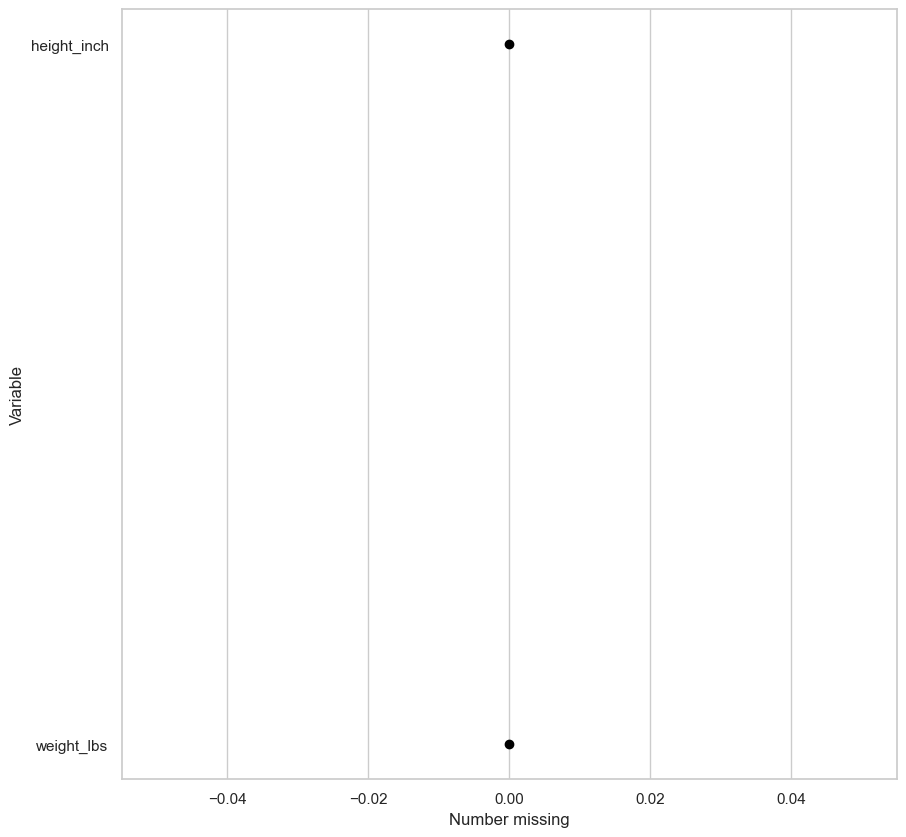

In [222]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"],
        how="any"
    )
    .select_columns(["weight_lbs", "height_inch"])
    .pipe(
        lambda df: df.missing.missing_variable_plot()
    )
)

c:\Users\User\.conda\envs\conda\Lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)


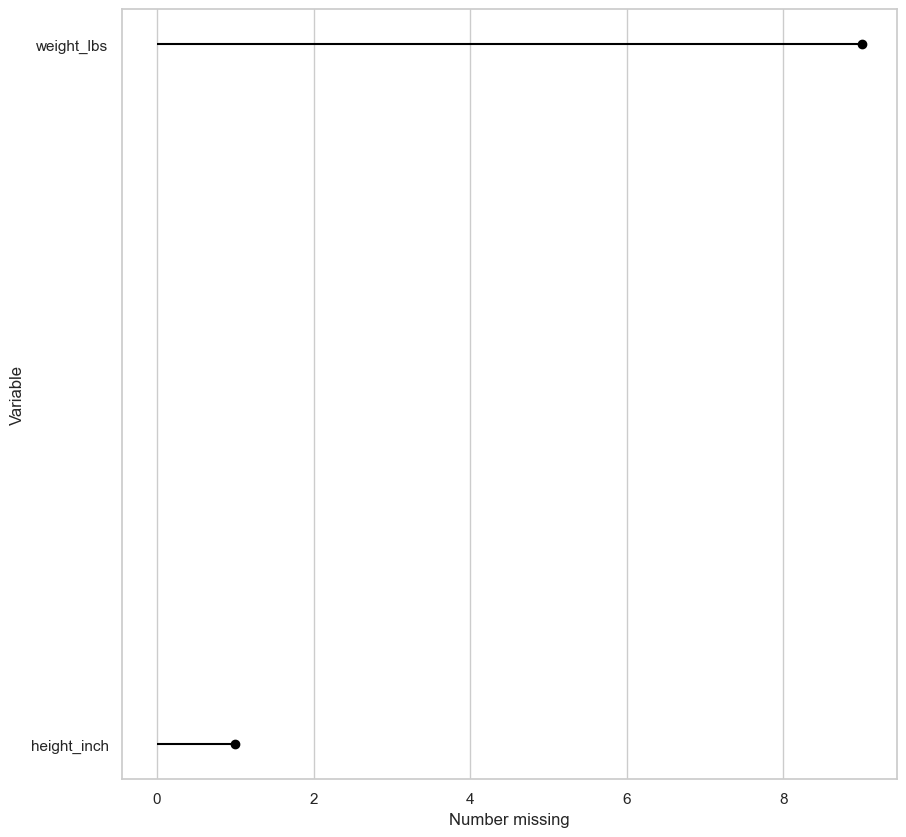

In [223]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"],
        how="all"
    )
    .select_columns(["weight_lbs", "height_inch"])
    .pipe(
        lambda df: df.missing.missing_variable_plot()
    )
)

✨ Podemos observar que cuando se usa "anny" en dropna, solo elimina cuando hay un valor nulo en la columna,
en cambio "all" elimina si tiene todos los valores de la fila en nulo

## Imputación de valores a los nulos

c:\Users\User\.conda\envs\conda\Lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)
C:\Users\User\AppData\Local\Temp\ipykernel_8120\857112027.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  func=lambda column: column.fillna(column.mean()) if "_NA" not in column.name else column


<Figure size 1000x1000 with 0 Axes>

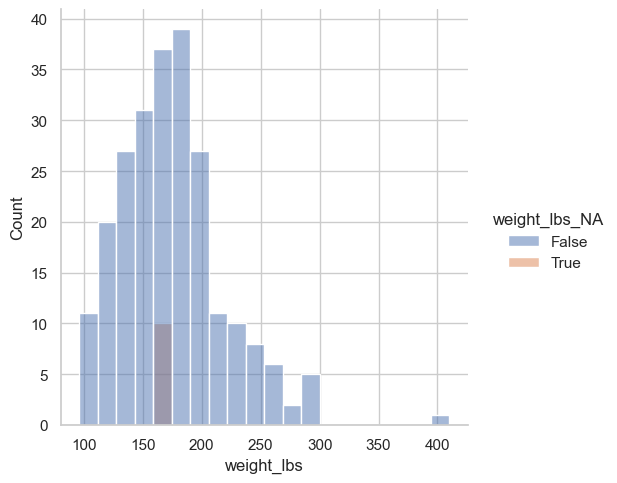

In [224]:
plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func=lambda column: column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="weight_lbs",
                hue="weight_lbs_NA"
            )
        )
    )
)
# En este caso hemos imputado el promedio a los valores faltantes